In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy as bp
#from lightgbm import LGBMRegressor
plt.style.use('seaborn-darkgrid')
np.set_printoptions(precision=2)

In [5]:
#データを読み込んで、カテゴリデータの”EJ”をダミー変数化
train_df = pd.read_csv('train.csv')
train_df['EJ'] = train_df['EJ'].apply(lambda x: 0 if x=='A' else 1)
train_df.head(5)

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [6]:
#IDと説明変数とラベルにデータを分割する
train_id = train_df.iloc[:,0]
train_x = train_df.iloc[:,1:-1]
train_y = train_df.iloc[:,-1]

train_null = train_x.isnull()

In [7]:
train_x.head(5)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614


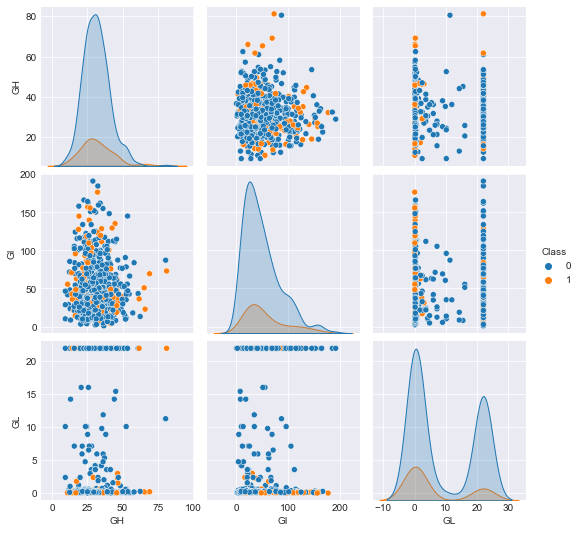

In [11]:
sns.pairplot(train_df.iloc[:,-4:],hue='Class',diag_kind='kde')

In [43]:
#欠損チェック
cols = train_x.columns
#full:完全データのカラム番号をリスト化
full_list = []
#null：不完全データのカラム番号をリスト化
null_list = []
#欠損があるカラムの平均値をリスト化
ave_list = []
std_list = []
for idx,col in enumerate(cols):
    if len(train_x[col].isnull().unique()) >1:
        null_list.append(idx)
        ave = train_x[col].mean()
        ave_list.append(ave)
        std_list.append(train_x[col].std())
        train_x[col] = train_x[col].fillna(ave)
    else:
        full_list.append(idx)

In [44]:
for col in cols:
    print(train_x[col].isnull().unique())

[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]


In [16]:
ave_list

[98.32873688509873,
 77.10415084878048,
 0.6888014997068403,
 1.8029004321428572,
 69.58259579622981,
 71.34152618181818,
 5.433198835689935,
 0.42150086016260163,
 8.530960818952922]

In [18]:
std_list

[96.47937100928215,
 159.0493017536481,
 0.26399434639980784,
 9.034720890906398,
 38.555706634186876,
 165.5515446262483,
 11.496256959751761,
 1.3053651569593518,
 10.32700977944447]

In [6]:
null_list

[12, 15, 16, 32, 40, 43, 47, 49, 55]

In [45]:
#欠損しているデータ数を調査
for col in null_list:
    print(len(train_null[train_null.iloc[:,col]==True]))

60
2
3
1
60
1
1
2
1


In [46]:
#説明変数を標準化する
train_id = train_df.iloc[:,0]
train_x_full = train_df.iloc[:,1:-1]
train_y_full = train_df.iloc[:,-1]
scaler = StandardScaler()
scaler.fit(train_x)
train_x_sc = pd.DataFrame(scaler.transform(train_x))

In [47]:
train_x_sc

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,-0.572153,-0.170975,-0.261669,-0.237889,-0.189295,-1.900558,-0.083417,-0.173502,-0.038354,-0.405383,...,-2.226608,0.162487,-0.035806,-0.250869,-0.940094,-0.410260,-0.655511,-0.948991,0.531241,-0.815752
1,-0.709105,-1.097801,-0.261669,-0.028701,-0.189295,-0.750457,-0.083417,0.678919,-0.104787,0.048541,...,0.084542,-0.458281,-0.060566,0.113218,-1.145070,-0.410260,0.687893,-0.238862,-0.509218,1.304239
2,-0.015212,-0.377169,-0.261669,-0.094845,-0.189295,0.465662,-0.083417,0.519453,-0.104787,-0.071089,...,0.517060,0.198331,-0.051023,0.596934,1.637944,-0.299210,-0.051850,-0.351743,-0.424754,-0.808323
3,-0.480851,0.138196,0.012347,0.547477,-0.189295,-0.729610,-0.083417,0.112088,-0.104787,-0.391109,...,1.617160,0.060027,-0.060566,-0.105234,-0.219883,-0.342195,-0.650833,0.858232,1.101332,-0.812311
4,-0.206946,0.100517,-0.261669,-0.356885,-0.189295,-0.628845,-0.013229,-1.649292,1.445139,0.125327,...,1.212850,0.236971,0.896815,-0.230064,-0.432313,0.099920,-0.318309,1.409422,-0.395228,-0.818054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,-0.699975,-0.161828,0.040232,-0.422762,0.275215,-0.802577,0.040875,-0.464891,-0.080610,-0.395082,...,-0.079062,-0.458281,-0.045332,-0.271674,-1.177680,0.593022,-0.340465,-0.694915,0.513497,1.304239
613,-0.088253,0.852755,-0.261669,0.108831,0.556117,0.170319,-0.082686,0.473063,-0.065661,0.100596,...,0.272594,0.417330,-0.045702,0.003992,1.519617,2.535523,-0.599582,-0.186764,2.048314,-0.813328
614,-0.106514,-0.453742,0.090140,0.235206,-0.011673,0.990330,-0.083417,1.113828,-0.104787,0.178374,...,0.654338,-0.458281,-0.060566,-0.271674,-0.076400,-0.019561,-0.424307,-0.540129,1.903449,1.304239
615,-0.243466,-0.973904,-0.261669,-0.219353,-0.189295,0.955584,-0.083417,-0.699741,-0.104787,-0.275772,...,-0.710915,0.333153,-0.054771,0.191237,0.387591,-0.410260,-0.657500,-0.646592,-0.370599,-0.809518


In [48]:
#相関係数行列を主成分分析
rmat = np.array(train_x_sc.corr())

pca = PCA()
pca.fit(rmat)
v_ratio = pca.explained_variance_ratio_
total = sum(v_ratio)
csum = []
add = 0
for v in v_ratio:
    add += v
    csum.append(add/total)

In [28]:
print(csum[10],csum[20],csum[30])

0.8279168814547764 0.9298478956038857 0.9763059063435274


In [55]:
#第N主成分までで寄与率~~%なのでＮまで使ってロジスティック回帰
n = 56
train_pca_x = pca.fit_transform(train_x_sc)

clf = LogisticRegression()

cv = KFold(n_splits = 5, random_state=0,shuffle=True)

score_train = []
score_test = []

for train_index,test_index in cv.split(train_pca_x):
    X_train,X_test = train_pca_x[train_index],train_pca_x[test_index]
    Y_train,Y_test = train_y[train_index],train_y[test_index]
    
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_train)
    confusion_matrix(y_pred,Y_train)
    score_train.append(clf.score(X_train,Y_train))
    
    y_pred = clf.predict(X_test)
    confusion_matrix(y_pred,Y_test)
    score_test.append(clf.score(X_test,Y_test))

In [56]:
print(score_train,score_test)

[0.9614604462474645, 0.9269776876267748, 0.9412955465587044, 0.9331983805668016, 0.9251012145748988] [0.8306451612903226, 0.9032258064516129, 0.9105691056910569, 0.9105691056910569, 0.9105691056910569]


In [298]:
#結論→欠損値の穴埋めはどれでやっても分類精度に差が出なかった
#このノートのパイプライン概要
#欠損値を含む行を抜粋
#欠損値を含まない行のデータ(548/617)の相関行列を主成分分析
#主成分得点でロジスティック回帰
#訓練データの正解率は93.6%、再現率は(77/87)
#検証データの正解率は～～%、再現率は(1/6)
#欠損値の穴埋め方法は
#①欠損を含まない説明変数から重回帰分析で予測
#②平均値で穴埋め
#③最頻値で穴埋め